In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load datasets
circonscriptions = pd.read_csv('/kaggle/input/rdc-election-2023/circonscriptions.csv')
resultat_province = pd.read_csv('/kaggle/input/rdc-election-2023/resultat_province.csv')
resultat_site_vote = pd.read_csv('/kaggle/input/rdc-election-2023/resultat_site_vote.csv')
sites_vote = pd.read_csv('/kaggle/input/rdc-election-2023/sites_vote.csv')

# Display basic information about each dataset
print("Circonscriptions dataset info:")
print(circonscriptions.info())

print("\nResultat Province dataset info:")
print(resultat_province.info())

print("\nResultat Site Vote dataset info:")
print(resultat_site_vote.info())

print("\nSites Vote dataset info:")
print(sites_vote.info())


Circonscriptions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   circonscription_id  203 non-null    int64 
 1   circonscription     203 non-null    object
 2   province_id         203 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ KB
None

Resultat Province dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   province_id         730 non-null    int64  
 1   ordre_bulletin      676 non-null    float64
 2   candidat_id         730 non-null    object 
 3   nom                 730 non-null    object 
 4   sigle               725 non-null    object 
 5   sexe                725 non-null    object 
 6   province            676 non-null   

**Check for Missing Values**

In [2]:
# Check for missing values in each dataset
print("Missing values in Circonscriptions dataset:")
print(circonscriptions.isnull().sum())

print("\nMissing values in Resultat Province dataset:")
print(resultat_province.isnull().sum())

print("\nMissing values in Resultat Site Vote dataset:")
print(resultat_site_vote.isnull().sum())

print("\nMissing values in Sites Vote dataset:")
print(sites_vote.isnull().sum())


Missing values in Circonscriptions dataset:
circonscription_id    0
circonscription       0
province_id           0
dtype: int64

Missing values in Resultat Province dataset:
province_id             0
ordre_bulletin         54
candidat_id             0
nom                     0
sigle                   5
sexe                    5
province               54
voixobtenues            0
pour_cand               0
bv_traites             54
bv_attendus            54
pour_bv                54
electeurs_attendus     54
bulletins_valides      54
bulletins_blancs       54
total_votants          54
pour_votants           54
postnom                57
prenom                  5
img                   730
dtype: int64

Missing values in Resultat Site Vote dataset:
site_vote_id         0
candidat_id          0
voixobtenues         0
pour_cand            0
nom                  0
postnom          60317
prenom           20109
sexe             20109
sigle            20109
img             542862
dtype: int64

M

**Handle Missing Values**

In [3]:
# Handle missing values, if necessary
# Example: Fill missing values with the mean or appropriate method
circonscriptions['province_id'].fillna(circonscriptions['province_id'].mean(), inplace=True)

# Check if missing values have been handled
print("Missing values after handling in Circonscriptions dataset:")
print(circonscriptions.isnull().sum())


Missing values after handling in Circonscriptions dataset:
circonscription_id    0
circonscription       0
province_id           0
dtype: int64


**Explore Relationships Between Datasets**

In [4]:
# Merge datasets to explore relationships
merged_result = pd.merge(resultat_site_vote, sites_vote, on='site_vote_id')
merged_result_province = pd.merge(merged_result, resultat_province, on='candidat_id')

# Display merged dataset information
print("Merged dataset info:")
print(merged_result_province.info())


Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14677398 entries, 0 to 14677397
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site_vote_id        int64  
 1   candidat_id         object 
 2   voixobtenues_x      int64  
 3   pour_cand_x         float64
 4   nom_x               object 
 5   postnom_x           object 
 6   prenom_x            object 
 7   sexe_x              object 
 8   sigle_x             object 
 9   img_x               float64
 10  nom_sv              object 
 11  circonscription_id  int64  
 12  province_id         int64  
 13  ordre_bulletin      float64
 14  nom_y               object 
 15  sigle_y             object 
 16  sexe_y              object 
 17  province            object 
 18  voixobtenues_y      int64  
 19  pour_cand_y         float64
 20  bv_traites          float64
 21  bv_attendus         float64
 22  pour_bv             float64
 23  electeurs_attendus  float64
 24  b

**Visualize Key Insights**

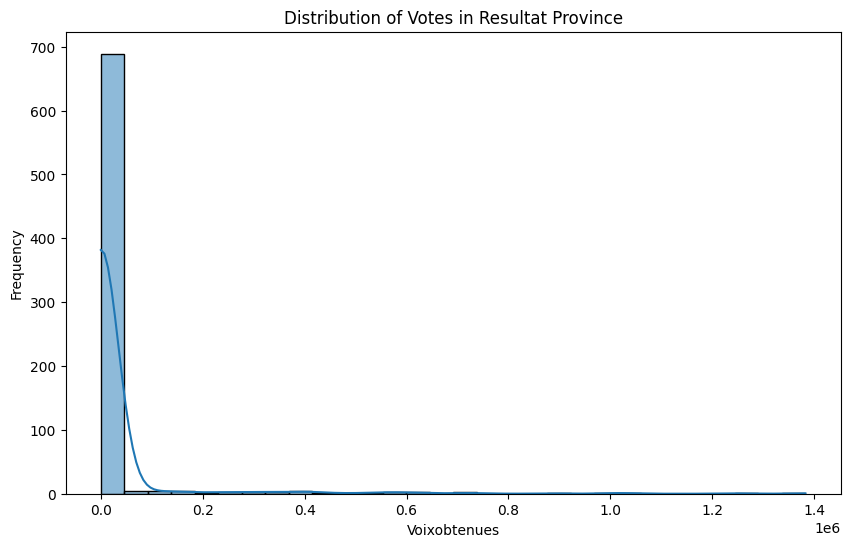

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of votes or other relevant data
plt.figure(figsize=(10, 6))
sns.histplot(resultat_province['voixobtenues'], bins=30, kde=True)
plt.title('Distribution of Votes in Resultat Province')
plt.xlabel('Voixobtenues')
plt.ylabel('Frequency')
plt.show()


**Explore Voter Demographics in Circonscriptions**

In [6]:
# Merge circonscriptions with other relevant datasets for voter demographics analysis
merged_demographics = pd.merge(circonscriptions, resultat_province, on='province_id')

# Display unique values and summary statistics for voter demographics
print("Unique values in voter demographics:")
print(merged_demographics['sexe'].unique())

print("\nSummary statistics for voter demographics:")
print(merged_demographics['sexe'].describe())


Unique values in voter demographics:
['M' 'F' nan]

Summary statistics for voter demographics:
count     5197
unique       2
top          M
freq      4796
Name: sexe, dtype: object


**Analyze Voting Patterns Across Sites**

In [7]:
# Merge relevant datasets for analyzing voting patterns across sites
merged_sites_analysis = pd.merge(resultat_site_vote, sites_vote, on='site_vote_id')

# Analyze voting patterns, e.g., total votes obtained by each candidate across different sites
votes_by_candidate = merged_sites_analysis.groupby('nom')['voixobtenues'].sum()

# Display voting patterns
print("Voting patterns across different sites:")
print(votes_by_candidate)


Voting patterns across different sites:
nom
ANZULUNI           13756
BAENDE             25651
BILE                6954
BOLAMBA             6323
BUSE                5313
DIONGO              6803
FAYULU            960478
IFOKU              15321
KATUMBI          3258538
KAZADI              5772
KIKUNI              8639
MAJONDO            15865
MASALU             13999
MATATA             14233
MUDEKEREZA          7576
MUKWEGE            39888
MUTAMBA            36308
MUZITO            201071
NGALASI            37535
NGILA               5182
NGOY                4139
NKEMA LILOO        17061
RADJABHO           69988
SESANGA            17838
TSHIANI K           9319
TSHISEKEDI      13215366
votes blancs       26411
Name: voixobtenues, dtype: int64


**Investigate Blank Votes and Valid Votes in Resultat Province**

In [8]:
# Calculate the percentage of blank votes and valid votes in Resultat Province
resultat_province['blank_vote_percentage'] = (resultat_province['bulletins_blancs'] / resultat_province['bulletins_valides']) * 100
resultat_province['valid_vote_percentage'] = 100 - resultat_province['blank_vote_percentage']

# Display the results
print("Percentage of Blank Votes and Valid Votes in Resultat Province:")
print(resultat_province[['blank_vote_percentage', 'valid_vote_percentage']])


Percentage of Blank Votes and Valid Votes in Resultat Province:
     blank_vote_percentage  valid_vote_percentage
0                 0.385298              99.614702
1                 0.385298              99.614702
2                 0.385298              99.614702
3                 0.385298              99.614702
4                 0.385298              99.614702
..                     ...                    ...
725                    NaN                    NaN
726                    NaN                    NaN
727                    NaN                    NaN
728                    NaN                    NaN
729                    NaN                    NaN

[730 rows x 2 columns]


**Explore Gender Distribution Among Candidates**

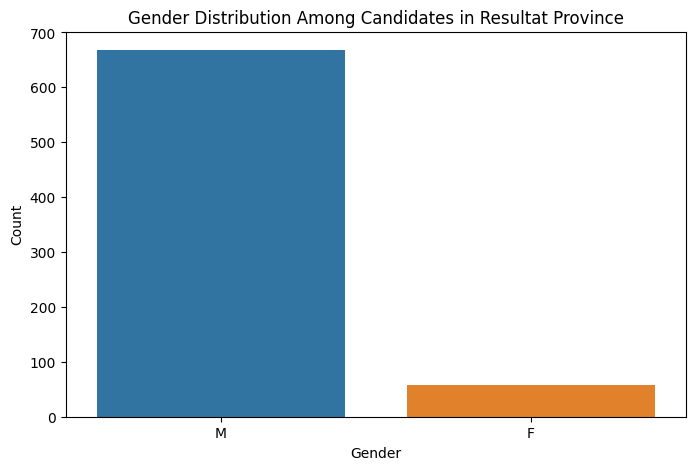

In [9]:
# Analyze the gender distribution among candidates in Resultat Province
gender_distribution = resultat_province['sexe'].value_counts()

# Visualize the gender distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution Among Candidates in Resultat Province')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Investigate Regional Variations in Voter Turnout**

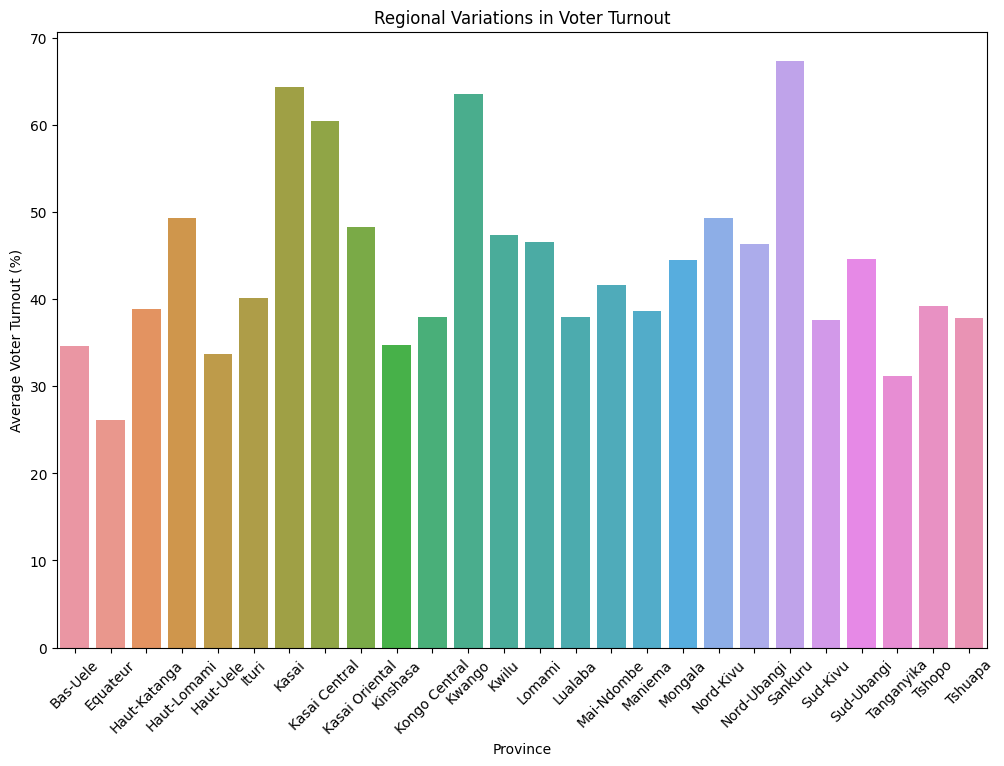

In [10]:
# Analyze regional variations in voter turnout in Resultat Province
regional_turnout = resultat_province.groupby('province')['pour_votants'].mean()

# Visualize regional variations in voter turnout
plt.figure(figsize=(12, 8))
sns.barplot(x=regional_turnout.index, y=regional_turnout.values)
plt.title('Regional Variations in Voter Turnout')
plt.xlabel('Province')
plt.ylabel('Average Voter Turnout (%)')
plt.xticks(rotation=45)
plt.show()


**Examine the Relationship Between Votes Obtained and Registered Voters**

In [11]:
# Calculate the correlation between votes obtained and registered voters in Resultat Province
correlation_votes_registered = resultat_province['voixobtenues'].corr(resultat_province['electeurs_attendus'])

# Display the correlation
print("Correlation between Votes Obtained and Registered Voters:")
print(correlation_votes_registered)


Correlation between Votes Obtained and Registered Voters:
0.10408034259977349


**Explore Candidates with the Highest Vote Percentage**

In [12]:
# Calculate the vote percentage for each candidate in Resultat Province
resultat_province['vote_percentage'] = (resultat_province['voixobtenues'] / resultat_province['electeurs_attendus']) * 100

# Identify candidates with the highest vote percentage
top_candidates = resultat_province.loc[resultat_province.groupby('province')['vote_percentage'].idxmax()]

# Display candidates with the highest vote percentage
print("Candidates with the Highest Vote Percentage in Each Province:")
print(top_candidates[['province', 'nom', 'vote_percentage']])


Candidates with the Highest Vote Percentage in Each Province:
           province         nom  vote_percentage
298        Bas-Uele  TSHISEKEDI        29.668405
147        Equateur  TSHISEKEDI        22.987737
446    Haut-Katanga     KATUMBI        25.770705
492     Haut-Lomami     KATUMBI        43.424886
318       Haut-Uele  TSHISEKEDI        27.470249
361           Ituri  TSHISEKEDI        24.538008
626           Kasai  TSHISEKEDI        61.273803
661   Kasai Central  TSHISEKEDI        60.132176
603  Kasai Oriental  TSHISEKEDI        48.070940
4          Kinshasa  TSHISEKEDI        27.228643
31    Kongo Central  TSHISEKEDI        35.596737
73           Kwango  TSHISEKEDI        40.405297
78            Kwilu      FAYULU        21.464340
570          Lomami  TSHISEKEDI        44.705125
518         Lualaba     KATUMBI        32.784814
128      Mai-Ndombe  TSHISEKEDI        39.545895
430         Maniema     KATUMBI        22.628499
212         Mongala  TSHISEKEDI        42.610332
371    

**Explore the Participation of Sites in Different Circonscriptions**

In [13]:
# Merge datasets to analyze site participation in different circonscriptions
merged_sites_circonscriptions = pd.merge(sites_vote, circonscriptions, on='circonscription_id')

# Count the number of sites in each circonscription
sites_count_by_circonscription = merged_sites_circonscriptions['circonscription'].value_counts()

# Display the participation of sites in different circonscriptions
print("Number of Sites in Each Circonscription:")
print(sites_count_by_circonscription)


Number of Sites in Each Circonscription:
circonscription
TSHIKAPA                 470
KASONGO-LUNDA            356
BULUNGU                  337
KENGE                    322
IDIOFA                   294
                        ... 
AFRIQUE DU SUD             1
BELGIQUE                   1
CANADA                     1
ETATS-UNIS D'AMERIQUE      1
FRANCE                     1
Name: count, Length: 203, dtype: int64


**Investigate the Relationship Between Candidate's Gender and Votes Obtained**

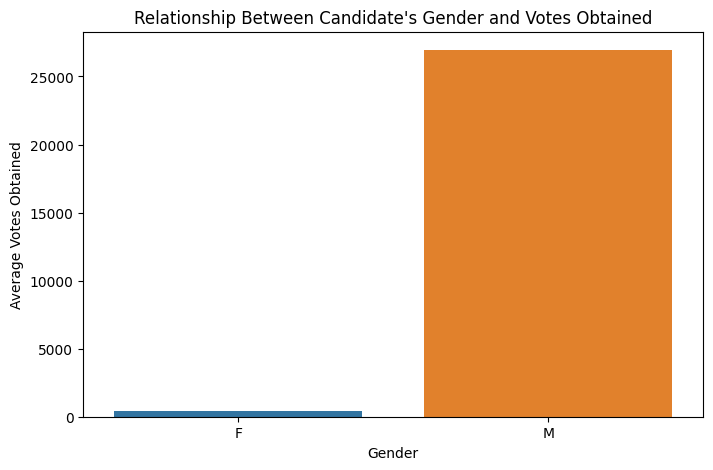

In [14]:
# Analyze the relationship between candidate's gender and votes obtained
gender_vs_votes = resultat_province.groupby('sexe')['voixobtenues'].mean()

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_vs_votes.index, y=gender_vs_votes.values)
plt.title('Relationship Between Candidate\'s Gender and Votes Obtained')
plt.xlabel('Gender')
plt.ylabel('Average Votes Obtained')
plt.show()


**Analyze the Proportion of Blank Votes to Total Votes**

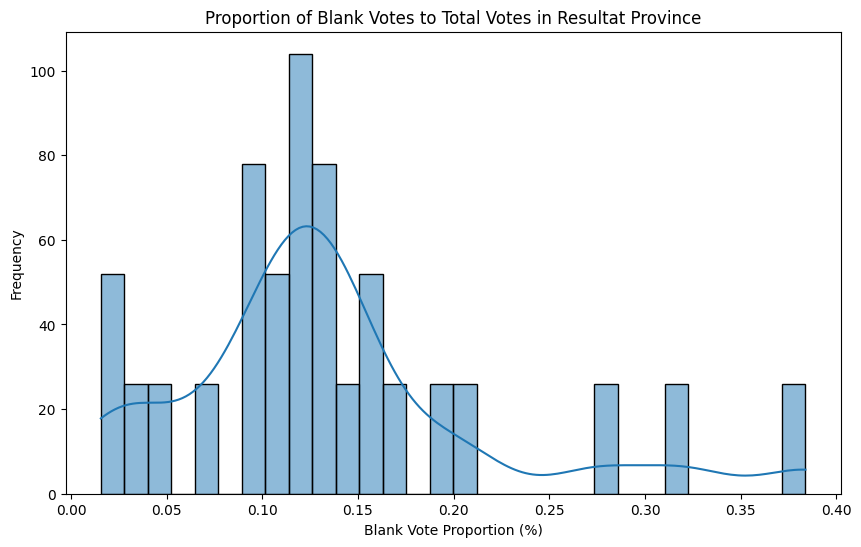

In [15]:
# Calculate the proportion of blank votes to total votes in Resultat Province
resultat_province['blank_vote_proportion'] = (resultat_province['bulletins_blancs'] / resultat_province['total_votants']) * 100

# Visualize the proportion of blank votes to total votes
plt.figure(figsize=(10, 6))
sns.histplot(resultat_province['blank_vote_proportion'], bins=30, kde=True)
plt.title('Proportion of Blank Votes to Total Votes in Resultat Province')
plt.xlabel('Blank Vote Proportion (%)')
plt.ylabel('Frequency')
plt.show()


**Explore Correlation Heatmap for Key Variables**

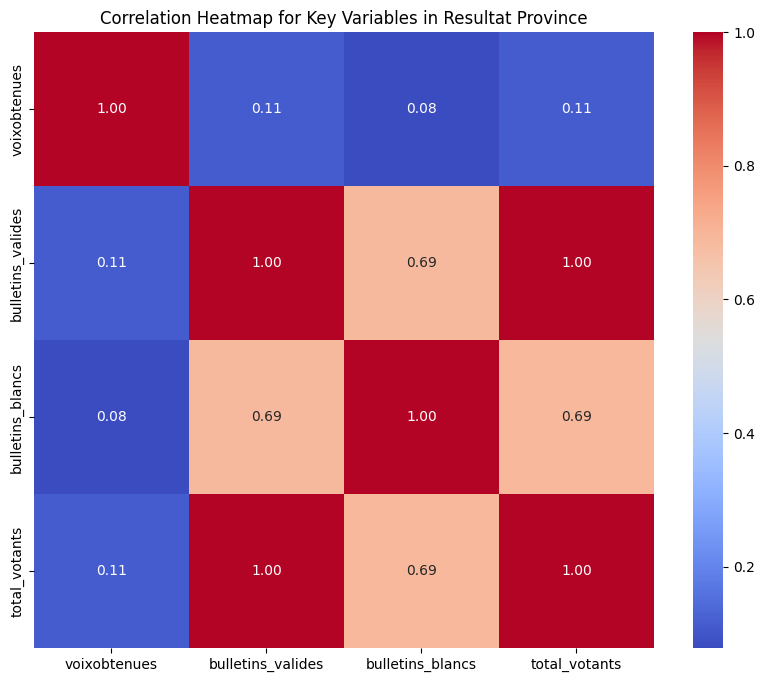

In [16]:
# Create a correlation heatmap for key variables in Resultat Province
correlation_matrix = resultat_province[['voixobtenues', 'bulletins_valides', 'bulletins_blancs', 'total_votants']].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Key Variables in Resultat Province')
plt.show()


**Explore Gender Distribution Among Voters**

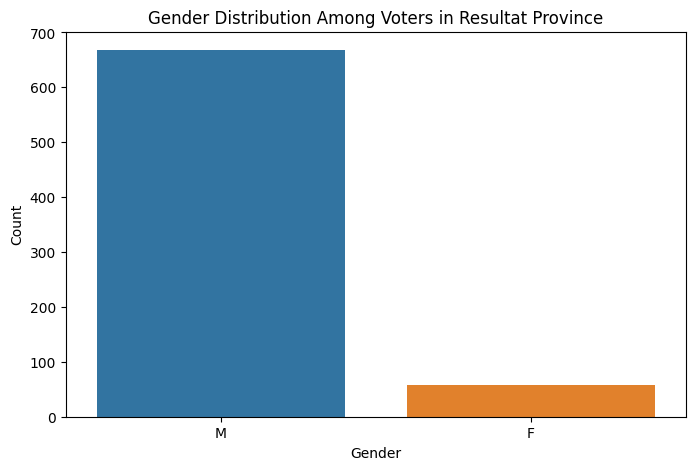

In [17]:
# Visualize gender distribution among voters in Resultat Province
plt.figure(figsize=(8, 5))
sns.countplot(x='sexe', data=resultat_province)
plt.title('Gender Distribution Among Voters in Resultat Province')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Visualize Candidate-wise Vote Distribution Across Provinces**

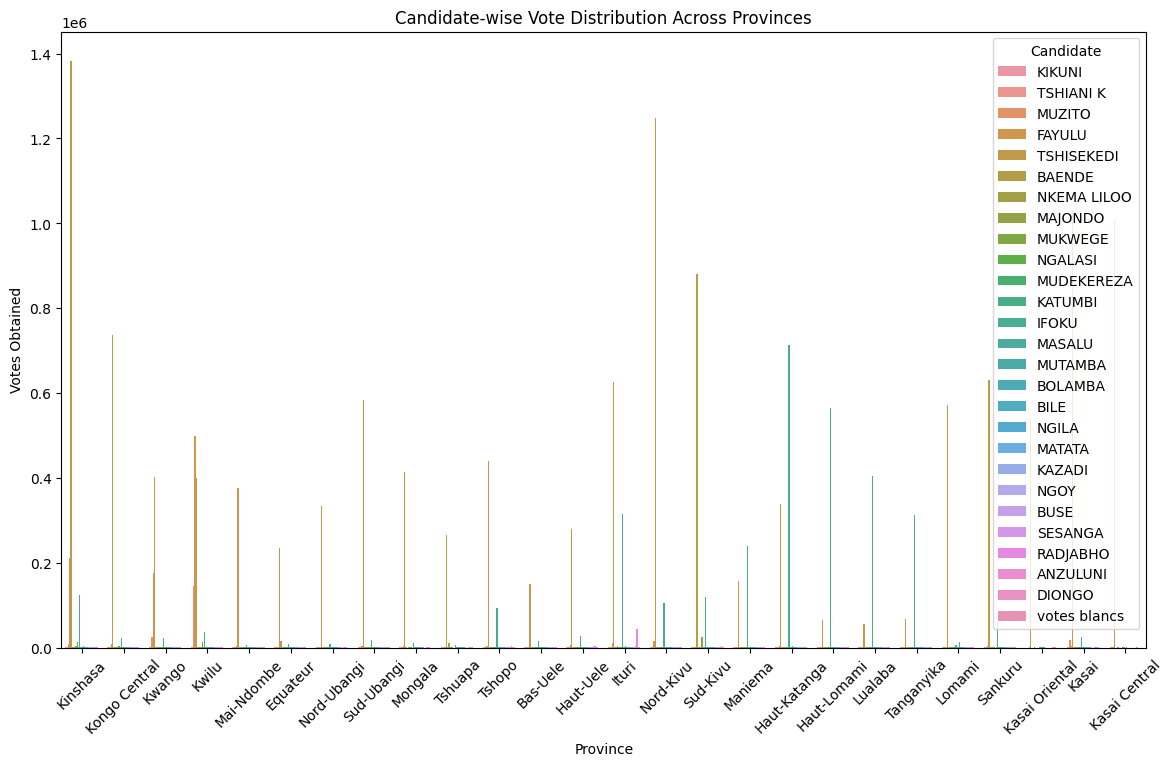

In [18]:
# Use a bar plot to visualize candidate-wise vote distribution across provinces
plt.figure(figsize=(14, 8))
sns.barplot(x='province', y='voixobtenues', hue='nom', data=resultat_province, errorbar=None)
plt.title('Candidate-wise Vote Distribution Across Provinces')
plt.xlabel('Province')
plt.ylabel('Votes Obtained')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.show()


**Explore the Distribution of Total Votes Obtained by Candidates**

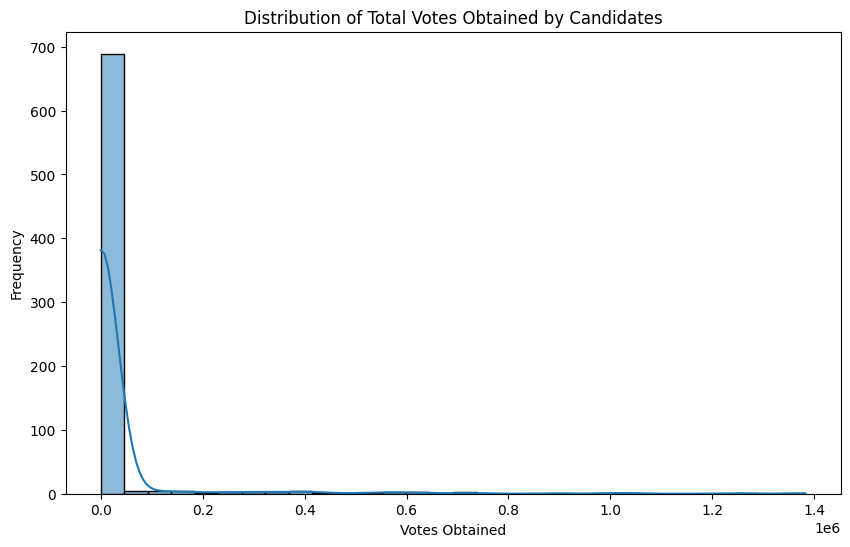

In [19]:
# Use a histogram to visualize the distribution of total votes obtained by candidates
plt.figure(figsize=(10, 6))
sns.histplot(resultat_province['voixobtenues'], bins=30, kde=True)
plt.title('Distribution of Total Votes Obtained by Candidates')
plt.xlabel('Votes Obtained')
plt.ylabel('Frequency')
plt.show()


**Visualize the Relationship Between Registered Voters and Votes Obtained**

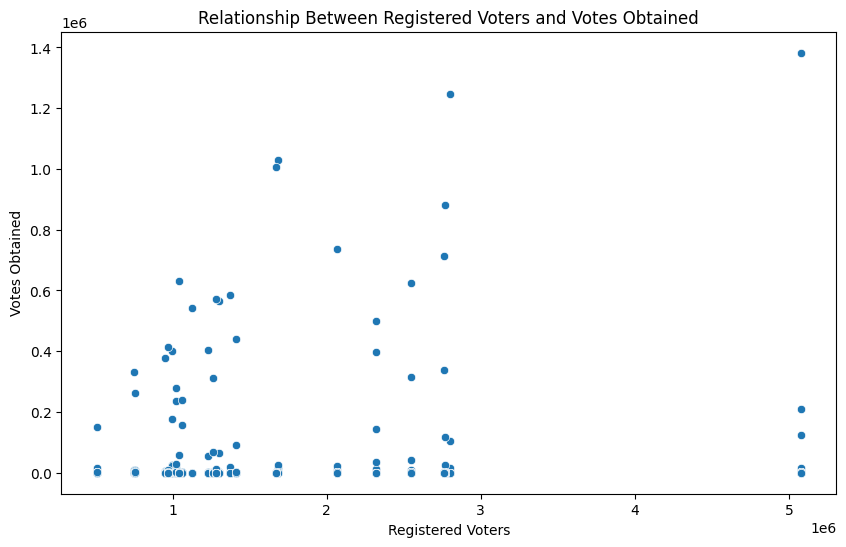

In [20]:
# Use a scatter plot to visualize the relationship between registered voters and votes obtained
plt.figure(figsize=(10, 6))
sns.scatterplot(x='electeurs_attendus', y='voixobtenues', data=resultat_province)
plt.title('Relationship Between Registered Voters and Votes Obtained')
plt.xlabel('Registered Voters')
plt.ylabel('Votes Obtained')
plt.show()


**Visualize the Pairwise Relationships in Key Variables**

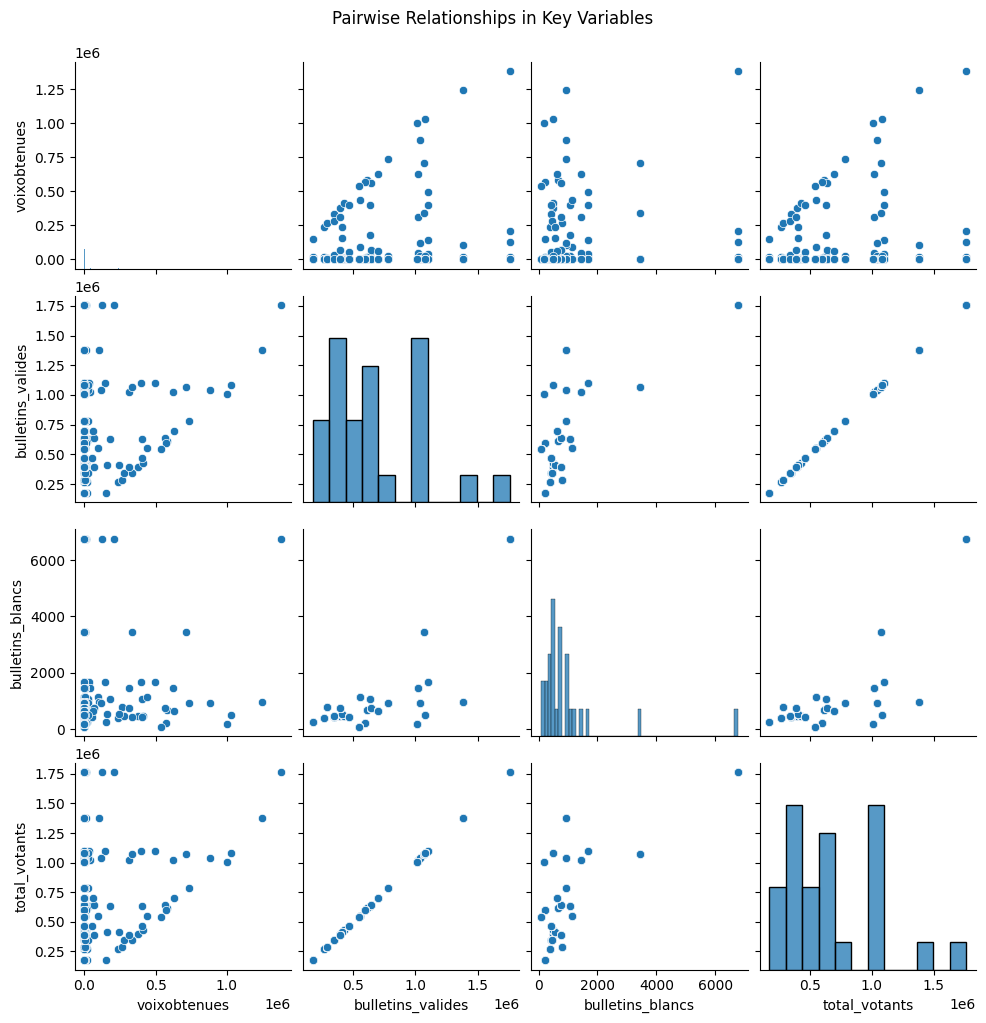

In [21]:
# Use a pair plot to visualize pairwise relationships in key variables
key_variables = resultat_province[['voixobtenues', 'bulletins_valides', 'bulletins_blancs', 'total_votants']]
sns.pairplot(key_variables)
plt.suptitle('Pairwise Relationships in Key Variables', y=1.02)
plt.show()


**Visualize the Distribution of Votes by Province with Pie Charts**

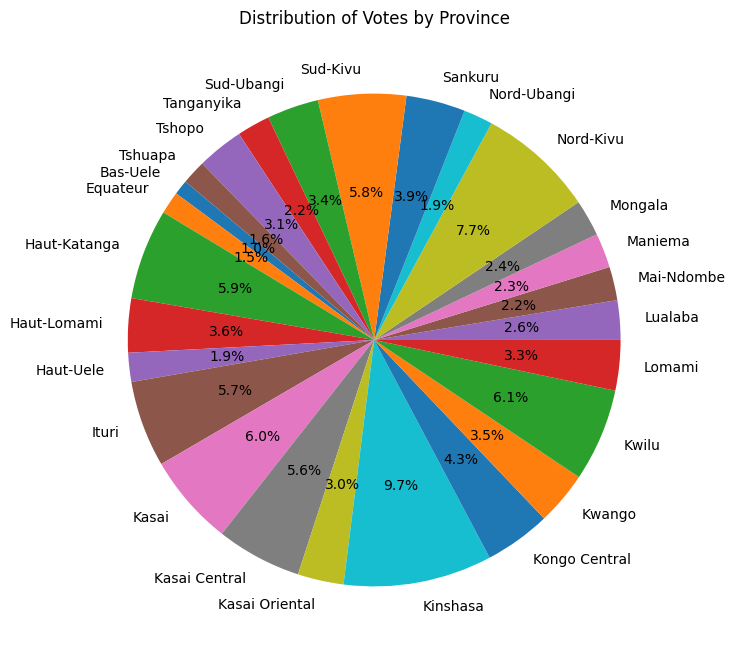

In [22]:
# Create a pie chart to visualize the distribution of votes by province
province_vote_distribution = resultat_province.groupby('province')['voixobtenues'].sum()
plt.figure(figsize=(12, 8))
plt.pie(province_vote_distribution, labels=province_vote_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Votes by Province')
plt.show()


**Explore the Distribution of Blank Votes Across Provinces with Pie Charts**

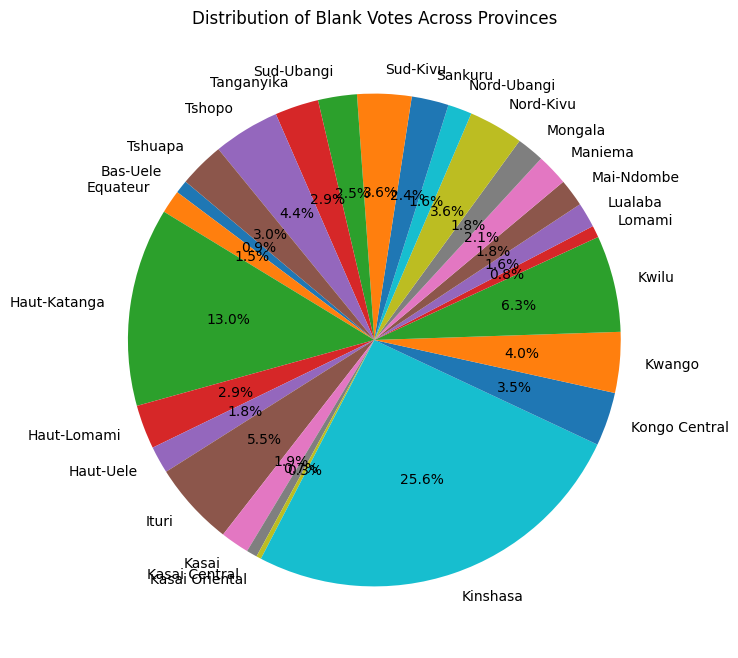

In [23]:
# Create a pie chart to visualize the distribution of blank votes across provinces
province_blank_votes_distribution = resultat_province.groupby('province')['bulletins_blancs'].sum()
plt.figure(figsize=(12, 8))
plt.pie(province_blank_votes_distribution, labels=province_blank_votes_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Blank Votes Across Provinces')
plt.show()


**Visualize the Distribution of Gender Among Candidates with a Pie Chart**

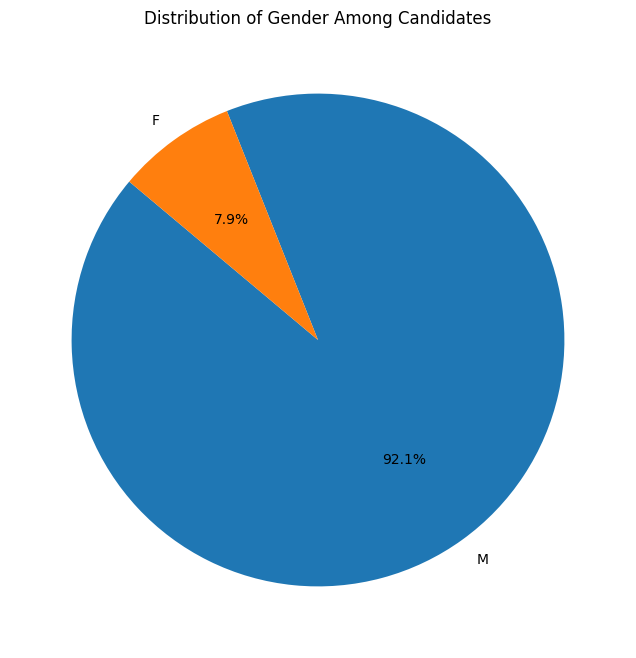

In [24]:
# Create a pie chart to visualize the distribution of gender among candidates
gender_distribution_candidates = resultat_province['sexe'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution_candidates, labels=gender_distribution_candidates.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender Among Candidates')
plt.show()


**Visualize the Relationship Between Registered Voters and Votes Obtained with a Bubble Chart**

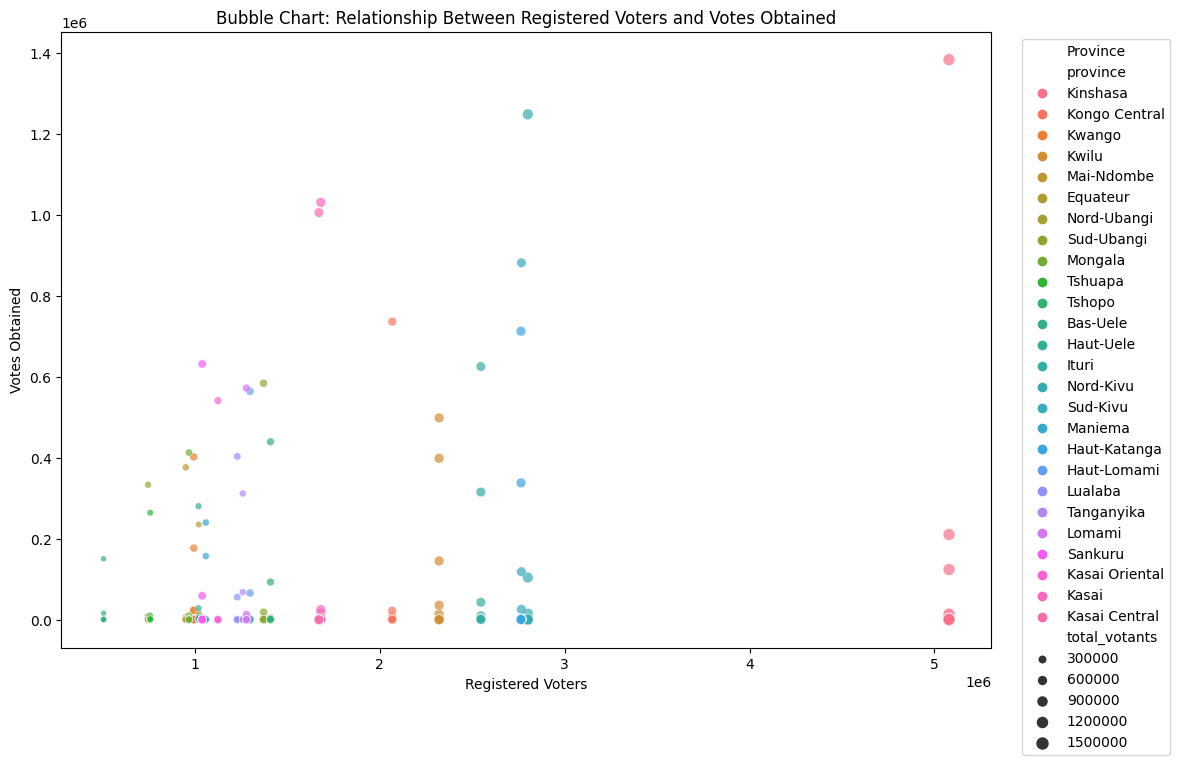

In [25]:
# Use a bubble chart to visualize the relationship between registered voters and votes obtained
plt.figure(figsize=(12, 8))
sns.scatterplot(x='electeurs_attendus', y='voixobtenues', size='total_votants', hue='province', data=resultat_province, alpha=0.7)
plt.title('Bubble Chart: Relationship Between Registered Voters and Votes Obtained')
plt.xlabel('Registered Voters')
plt.ylabel('Votes Obtained')
plt.legend(title='Province', loc='upper right', bbox_to_anchor=(1.2,1))
plt.show()


**Visualize the Gender Distribution Among Candidates Using a Donut Plot**

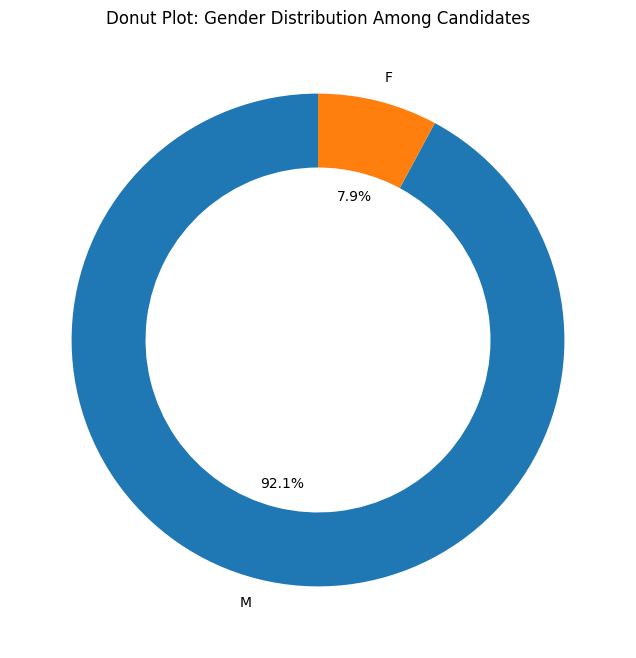

In [26]:
# Use a donut plot to visualize the gender distribution among candidates
gender_distribution_donut = resultat_province['sexe'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution_donut, labels=gender_distribution_donut.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title('Donut Plot: Gender Distribution Among Candidates')
plt.show()


**Visualize the Relationship Between Votes Obtained and Total Voters Using a 3D Scatter Plot**

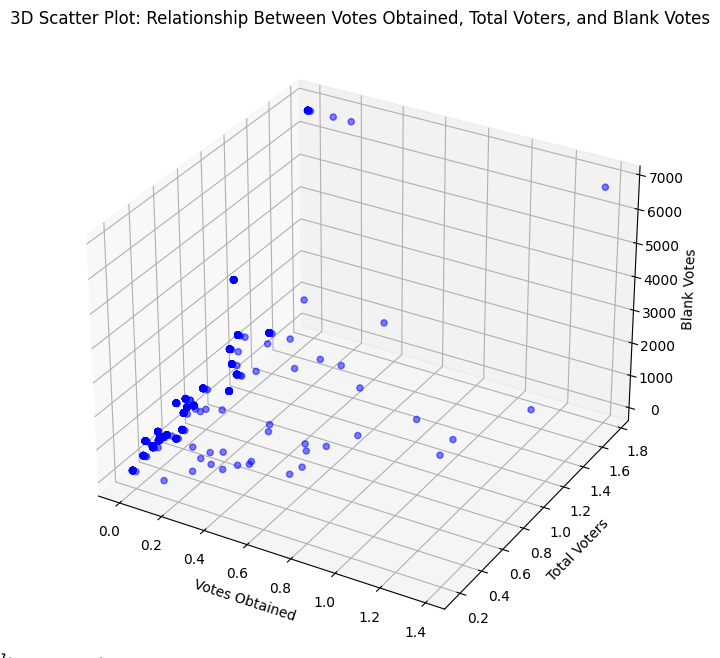

In [27]:
# Use a 3D scatter plot to visualize the relationship between votes obtained, total voters, and blank votes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(resultat_province['voixobtenues'], resultat_province['total_votants'], resultat_province['bulletins_blancs'], c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Votes Obtained')
ax.set_ylabel('Total Voters')
ax.set_zlabel('Blank Votes')
ax.set_title('3D Scatter Plot: Relationship Between Votes Obtained, Total Voters, and Blank Votes')
plt.show()


**Visualize the Proportion of Blank Votes to Total Votes Using a Stacked Bar Chart**

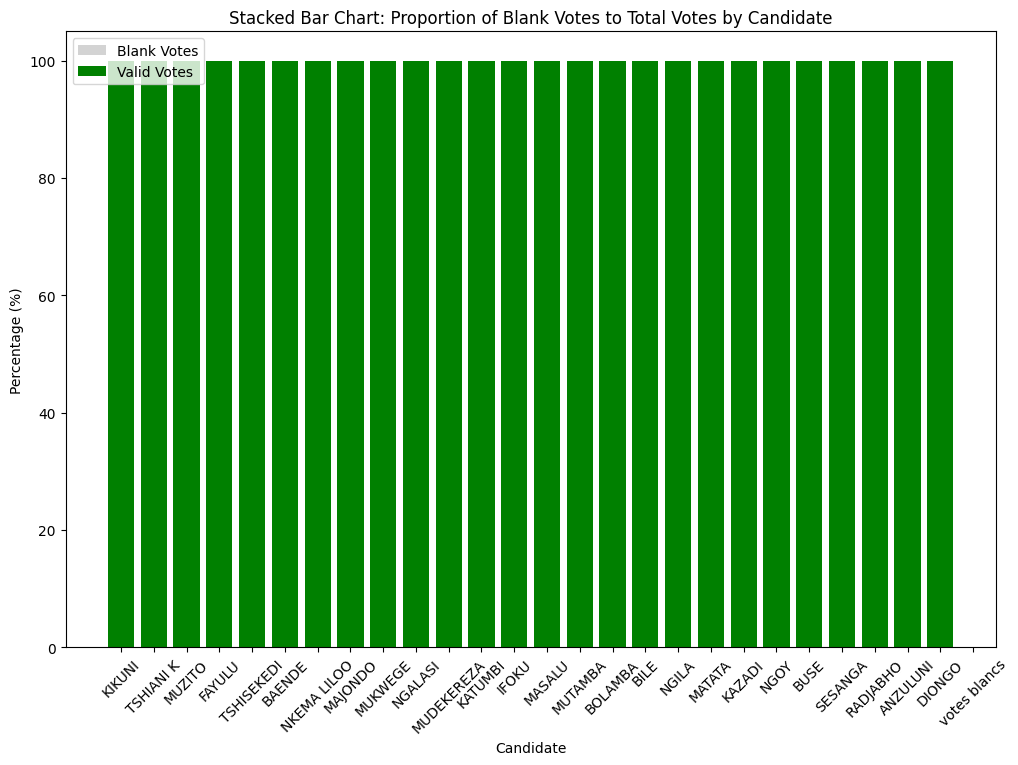

In [28]:
# Use a stacked bar chart to visualize the proportion of blank votes to total votes by candidate
resultat_province['valid_vote_percentage'] = 100 - resultat_province['blank_vote_percentage']
plt.figure(figsize=(12, 8))
plt.bar(resultat_province['nom'], resultat_province['blank_vote_percentage'], label='Blank Votes', color='lightgrey')
plt.bar(resultat_province['nom'], resultat_province['valid_vote_percentage'], bottom=resultat_province['blank_vote_percentage'], label='Valid Votes', color='green')
plt.title('Stacked Bar Chart: Proportion of Blank Votes to Total Votes by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
